# Physics 420/580 Midterm Exam 
## October 25, 2019 1pm-2pm

Do the following problems.  Use the Jupyter notebook, inserting your code and any textual answers/explanations in cells between the questions. (Feel free to add additional cells!)  Marks will be given based on how clearly you demonstrate your understanding.    

There are no restrictions on downloading from the internet, eclass,  or the use of books, notes, or any other widely available computing resources.  However, **you are not allowed** to communicate with each other or collaborate in any way and uploading to the internet or sending or receiving direct communications is not appropriate.  

When you are finished, upload the jupyter notebook to eclass. Eclass times out after 2:05 so make sure that you upload things before then.  Also be careful to save the notebook periodically and that you upload your final exam file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.optimize import least_squares
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [2]:
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)

In [3]:
def add_labels(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

## Graphics

Consider the function:
$$y(x)=x^{p-1}e^{-x}$$

Plot the function for $0<x<100$ for each of $p=2,5,10,20.$


In [4]:
"""Plan:

- Code the function.
- Plot the function for some p
- For loop over p

"""

'Plan:\n\n- Code the function.\n- Plot the function for some p\n- For loop over p\n\n'

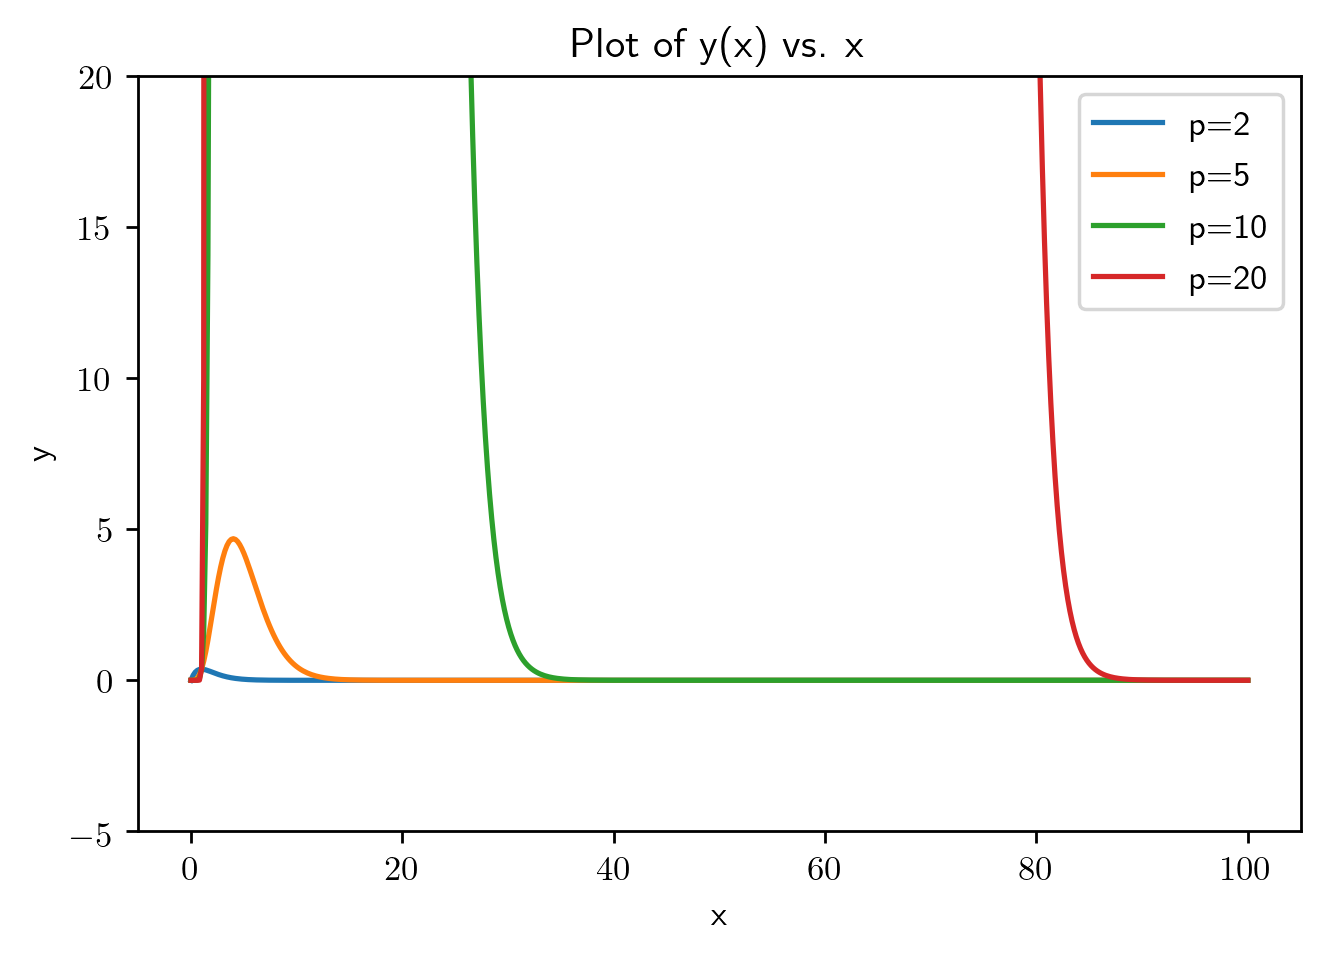

In [5]:
xdata = np.linspace(0, 100, num=500)

for p in [2, 5, 10, 20]:
    def y(x):
        return x**(p-1)*np.exp(-x)
    
    #All on the same figure
    plt.plot(xdata, y(xdata), label='p='+str(p))

plt.ylim(-5, 20)
add_labels('x', 'y', 'Plot of y(x) vs. x')

# It's hard to see when all graphs are on the same figure, so in the next code block we make different figures


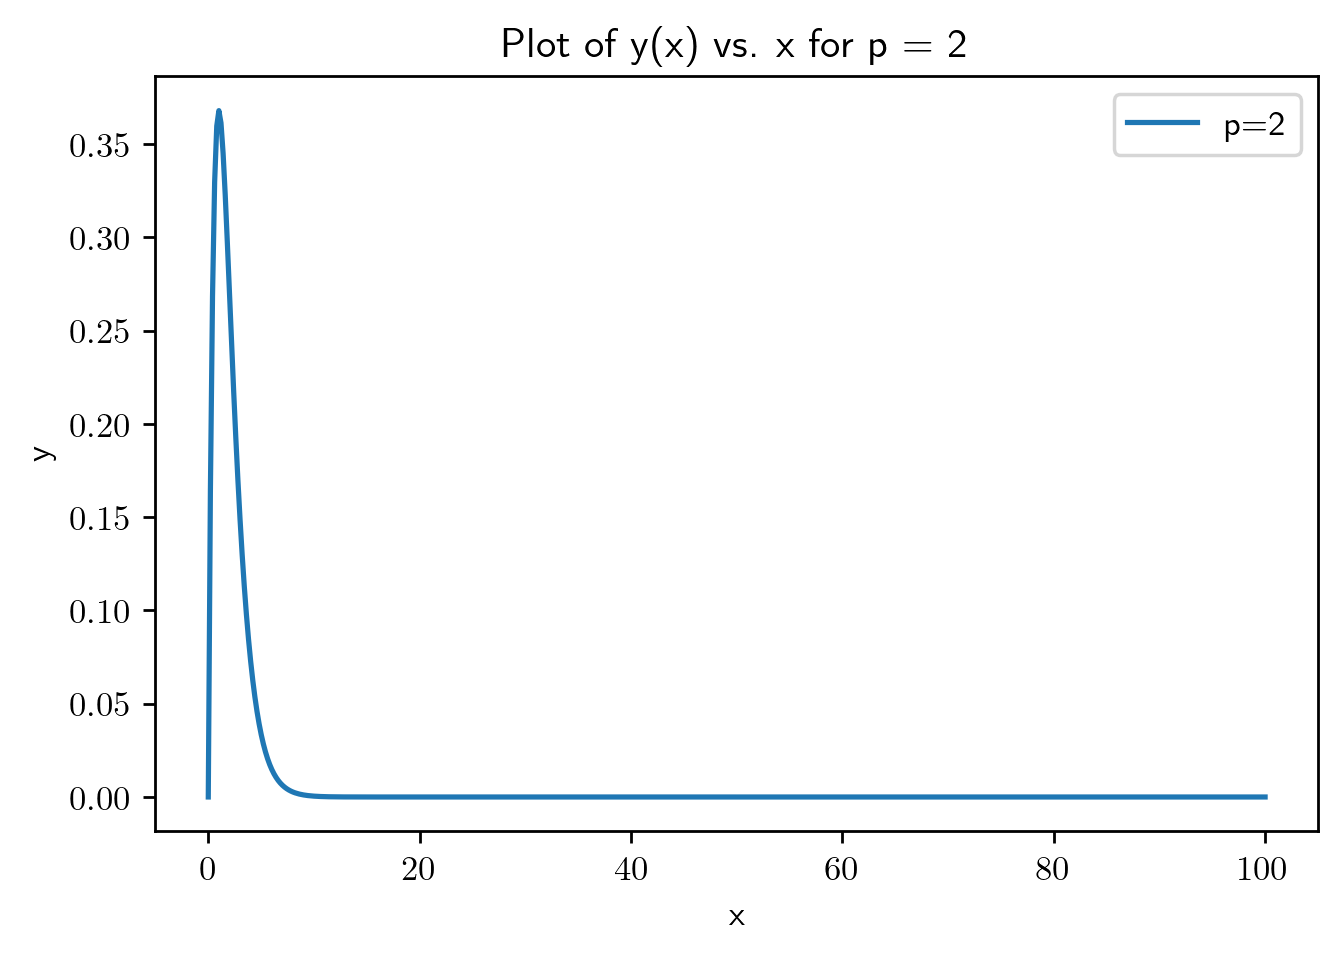

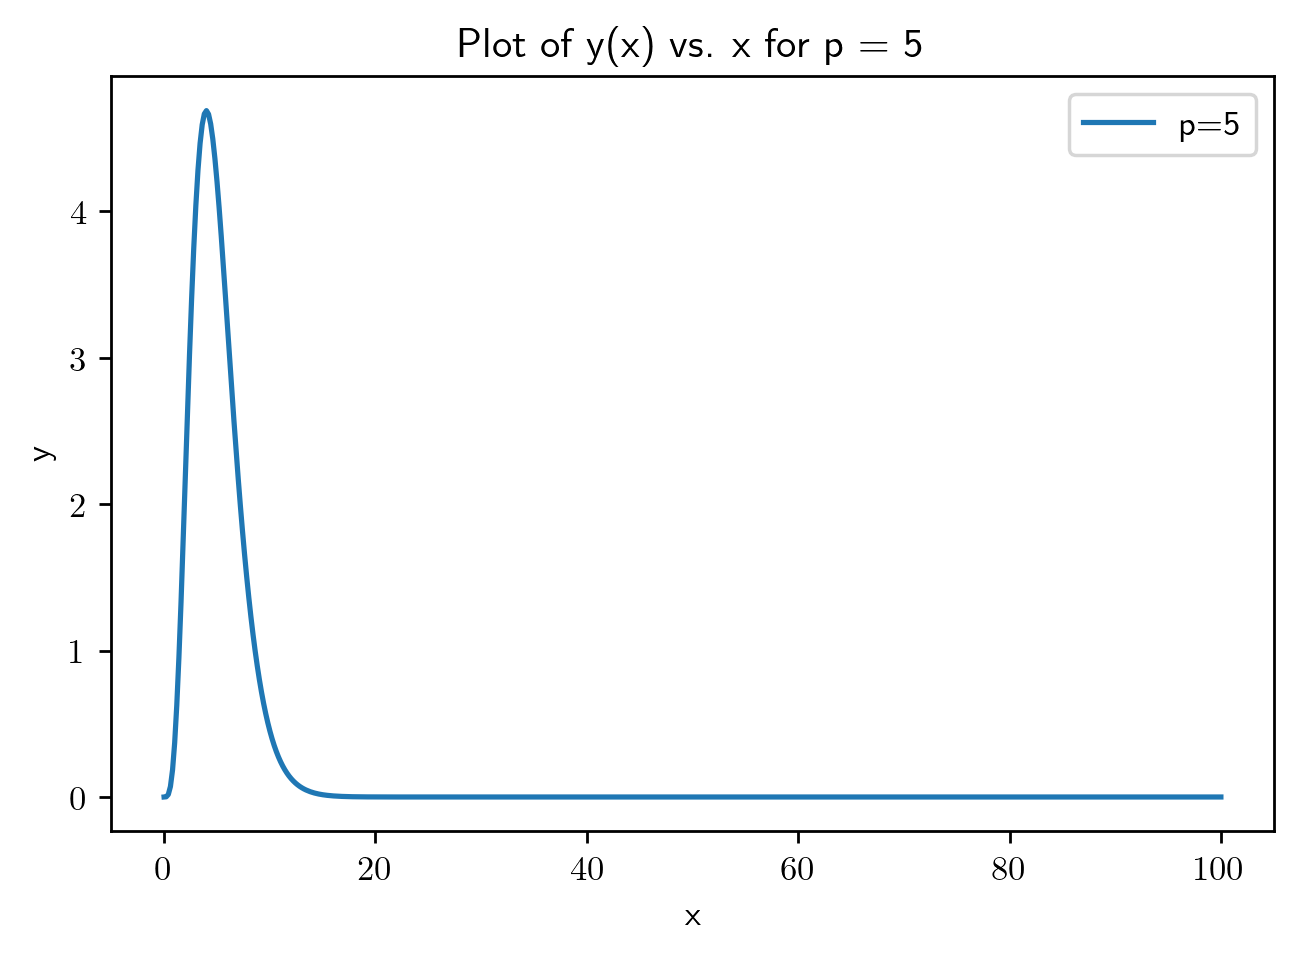

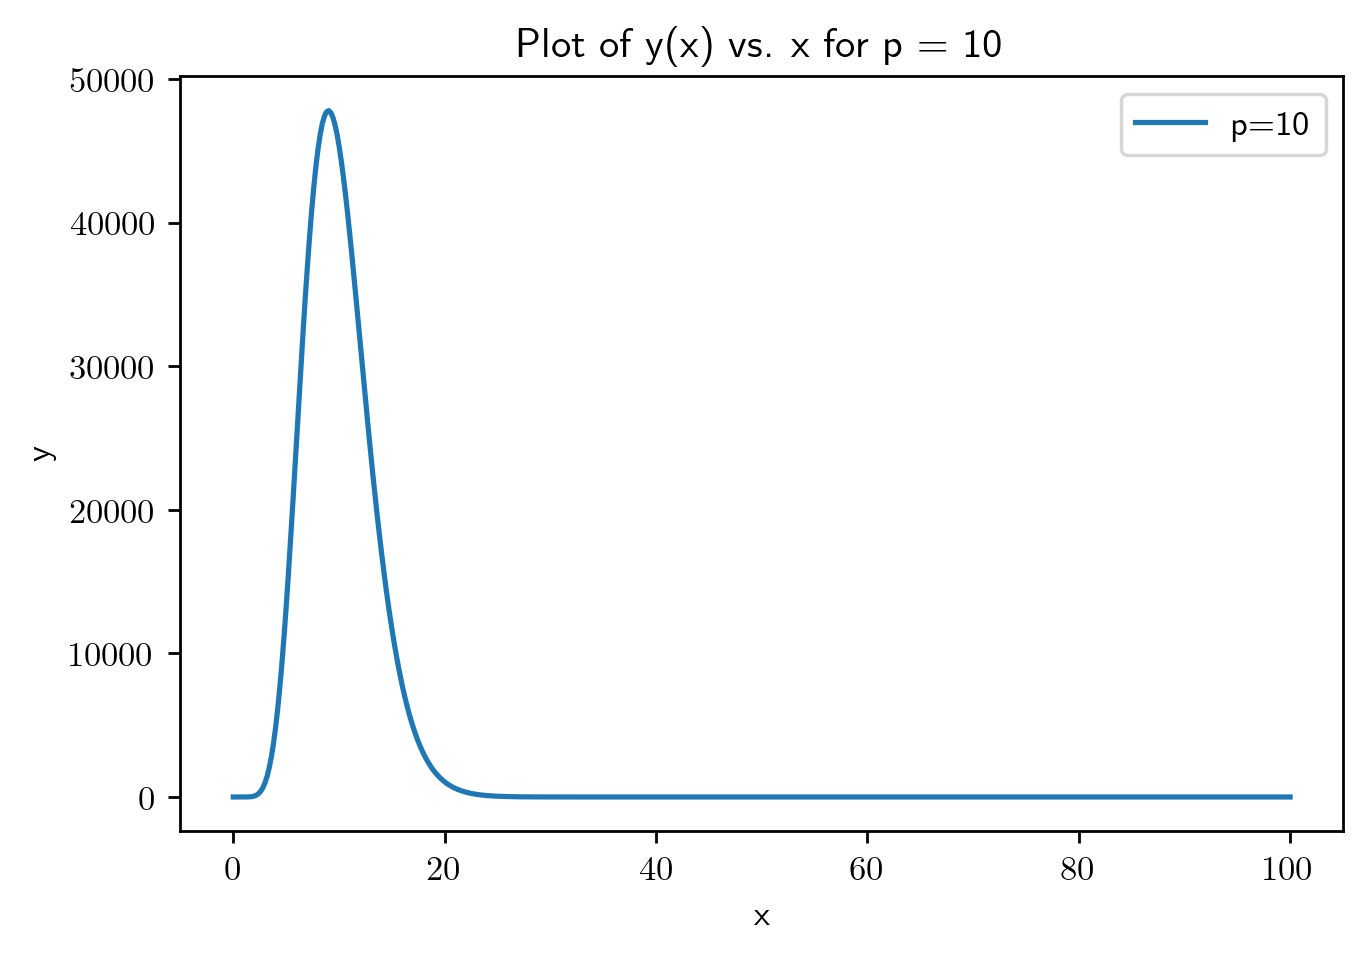

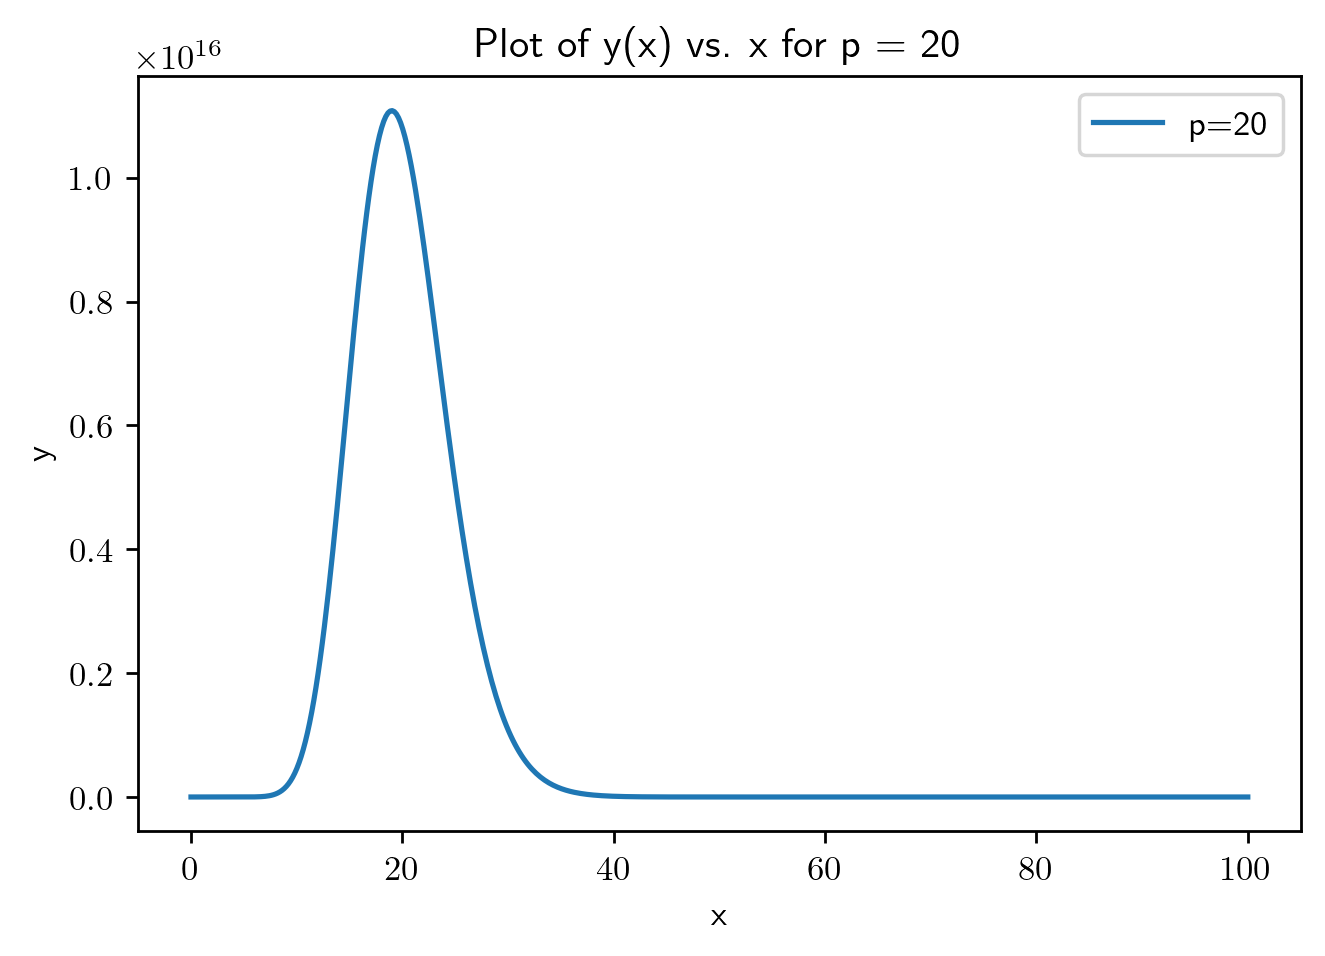

In [6]:
xdata = np.linspace(0, 100, num=500)

for p in [2, 5, 10, 20]:
    def y(x):
        return x**(p-1)*np.exp(-x)
    
    #On separate figures
    plt.figure() 
    plt.plot(xdata, y(xdata), label='p='+str(p))
    add_labels('x', 'y', 'Plot of y(x) vs. x for p = '+str(p))


# Gamma Function

Find the solutions of the ordinary differential equation $$df/dx =x^{p-1}e^{-x}$$.  The value of this solution at "large x" is the gamma function $\Gamma(p)$.  

Find and plot the solutions $f(x)$ for $p=2,5,10,20.$  Comment on how big "large x" needs to be. 

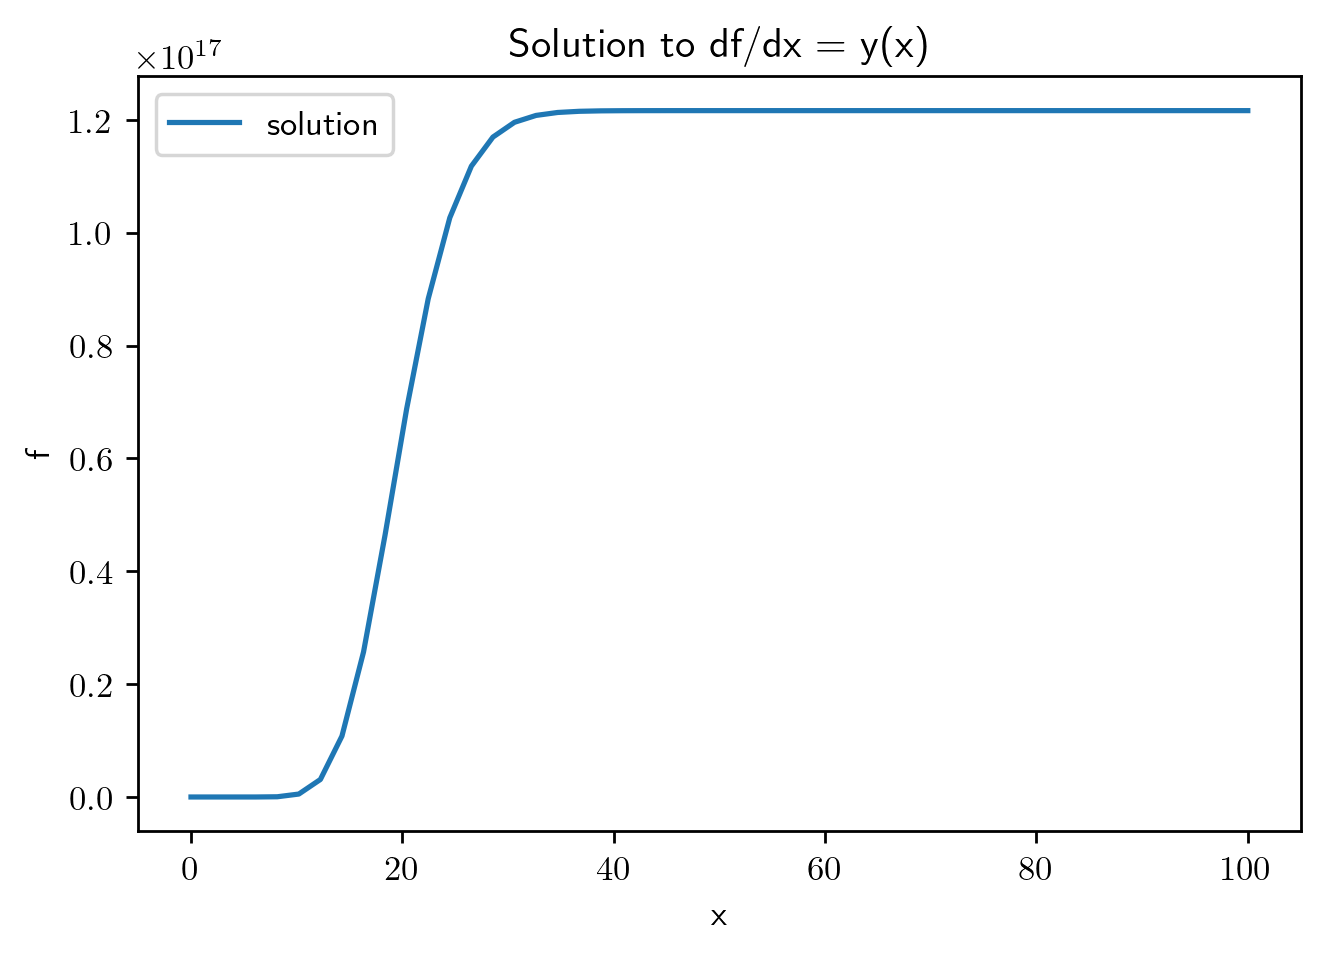

In [70]:
"""
Plan:

- df/dx = y(x) (the function we integrated before)
- call odeint
- for loop it over p = 2, 5, 10, 20
- intial condition should probably be y = 0, since when x = 0 implies y(x) = 0.
- time is the x domain
"""

t = np.linspace(0, 100)

def dfdx(x, t):
    return y(t)

f = odeint(dfdx, 0, t)

plt.plot(t, f, label='solution')
add_labels('x', 'f', 'Solution to df/dx = y(x)')

# Now for loop it

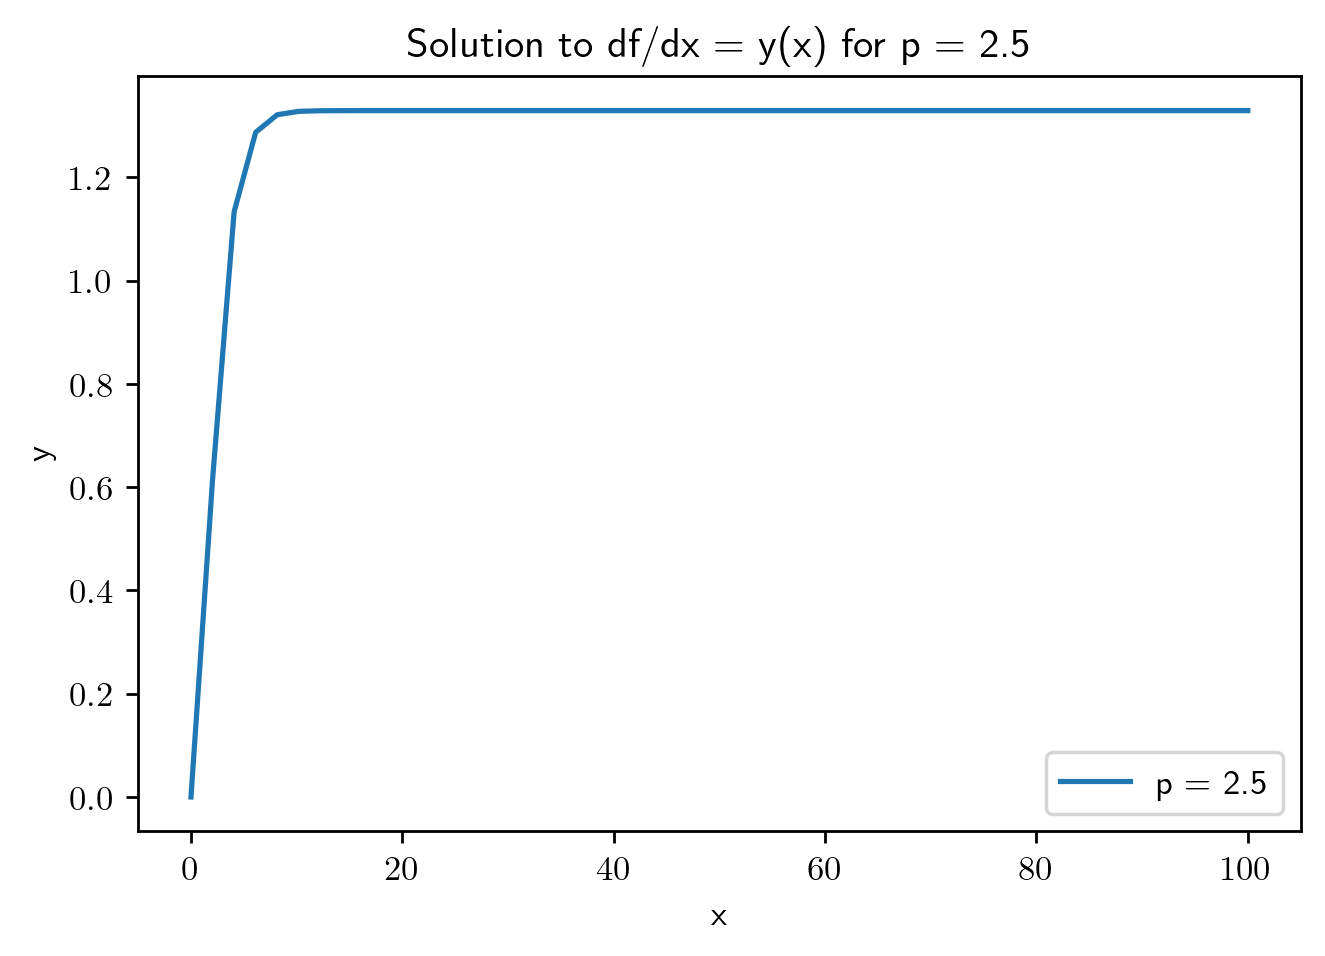

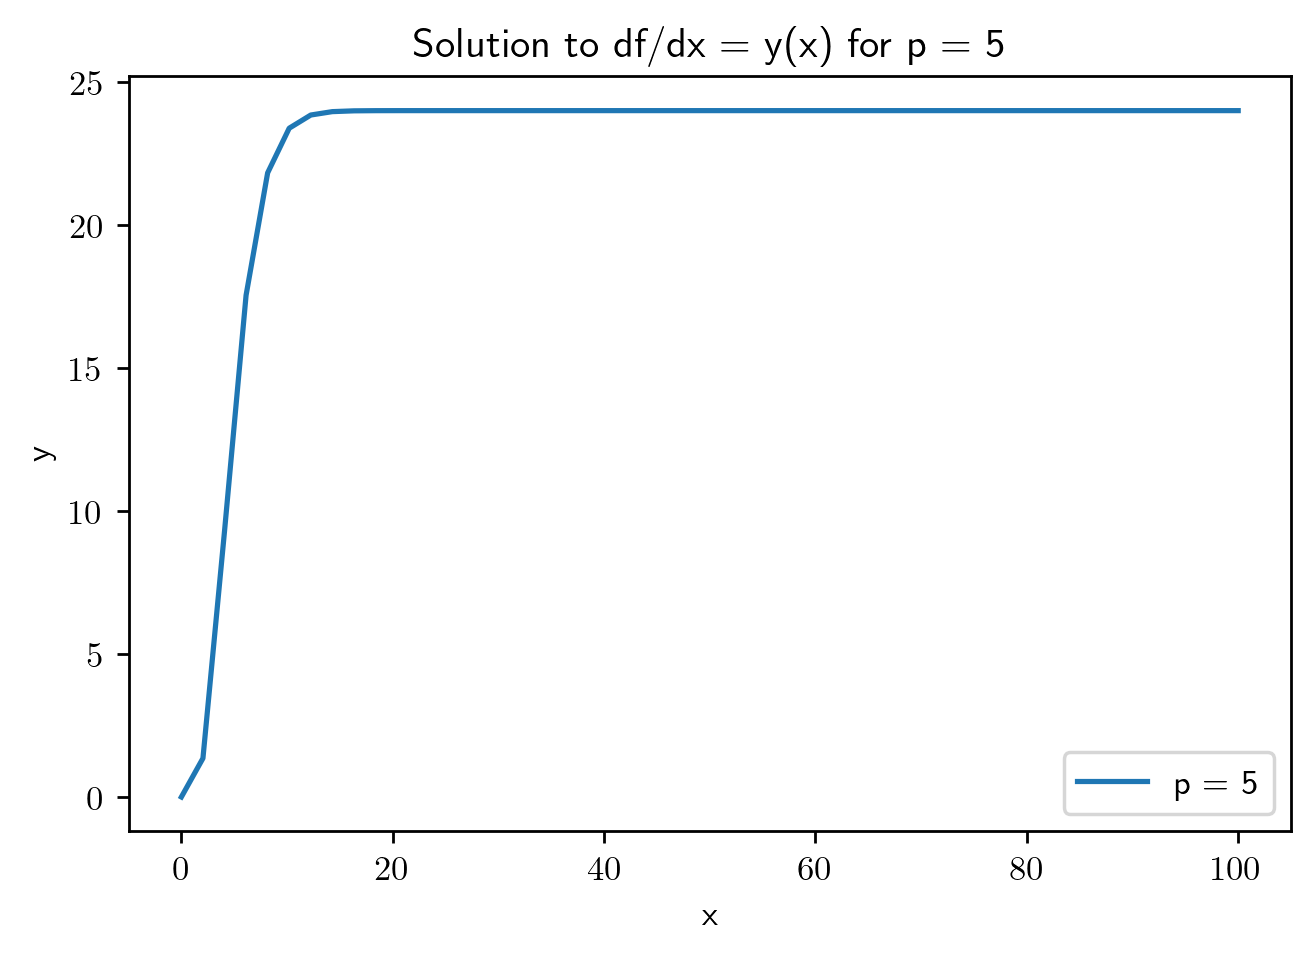

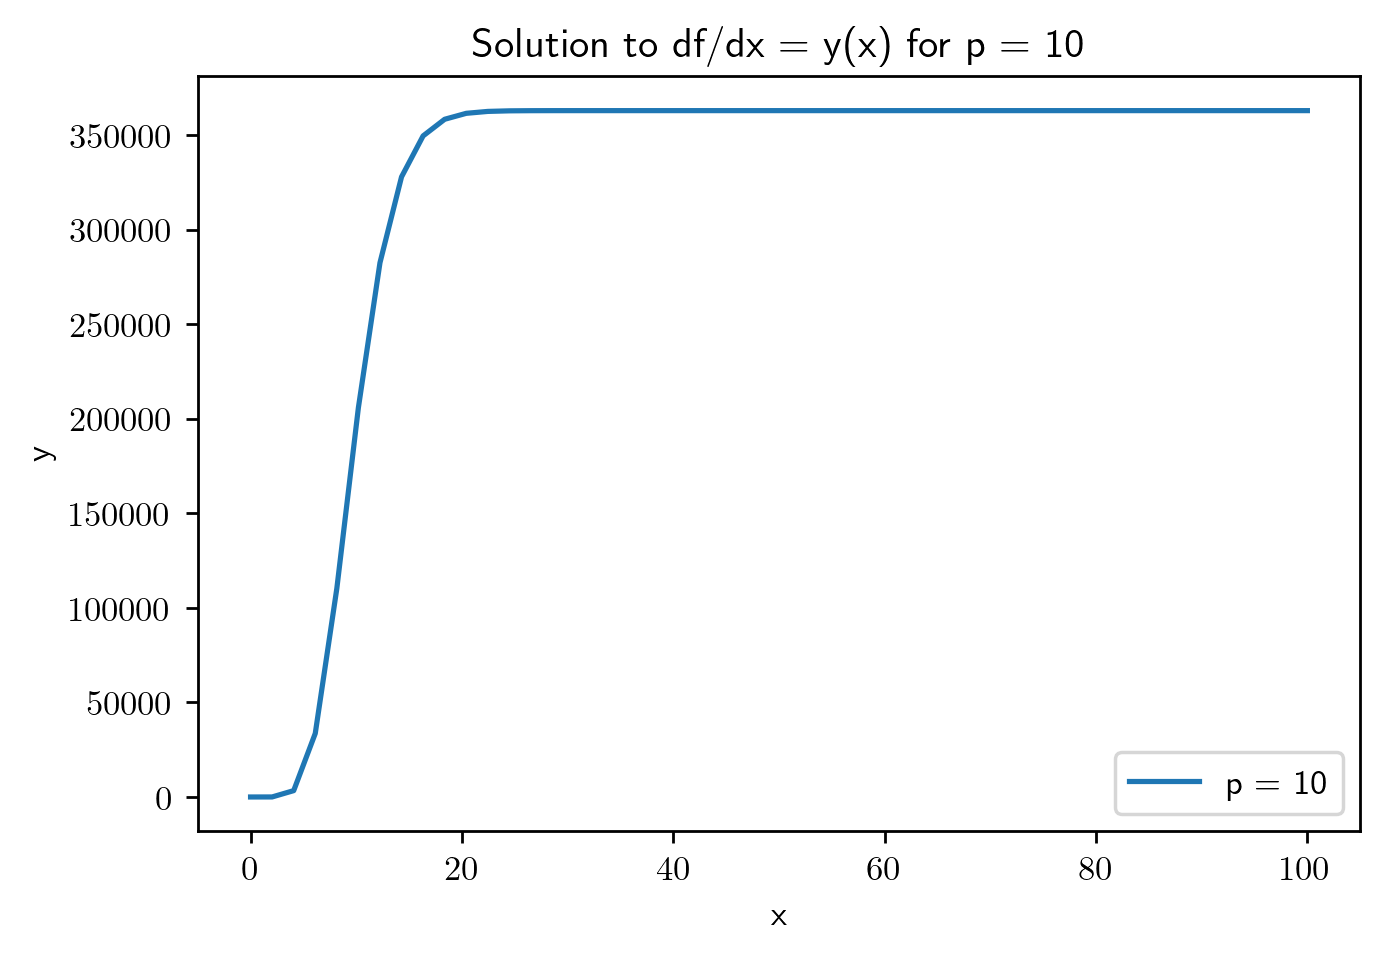

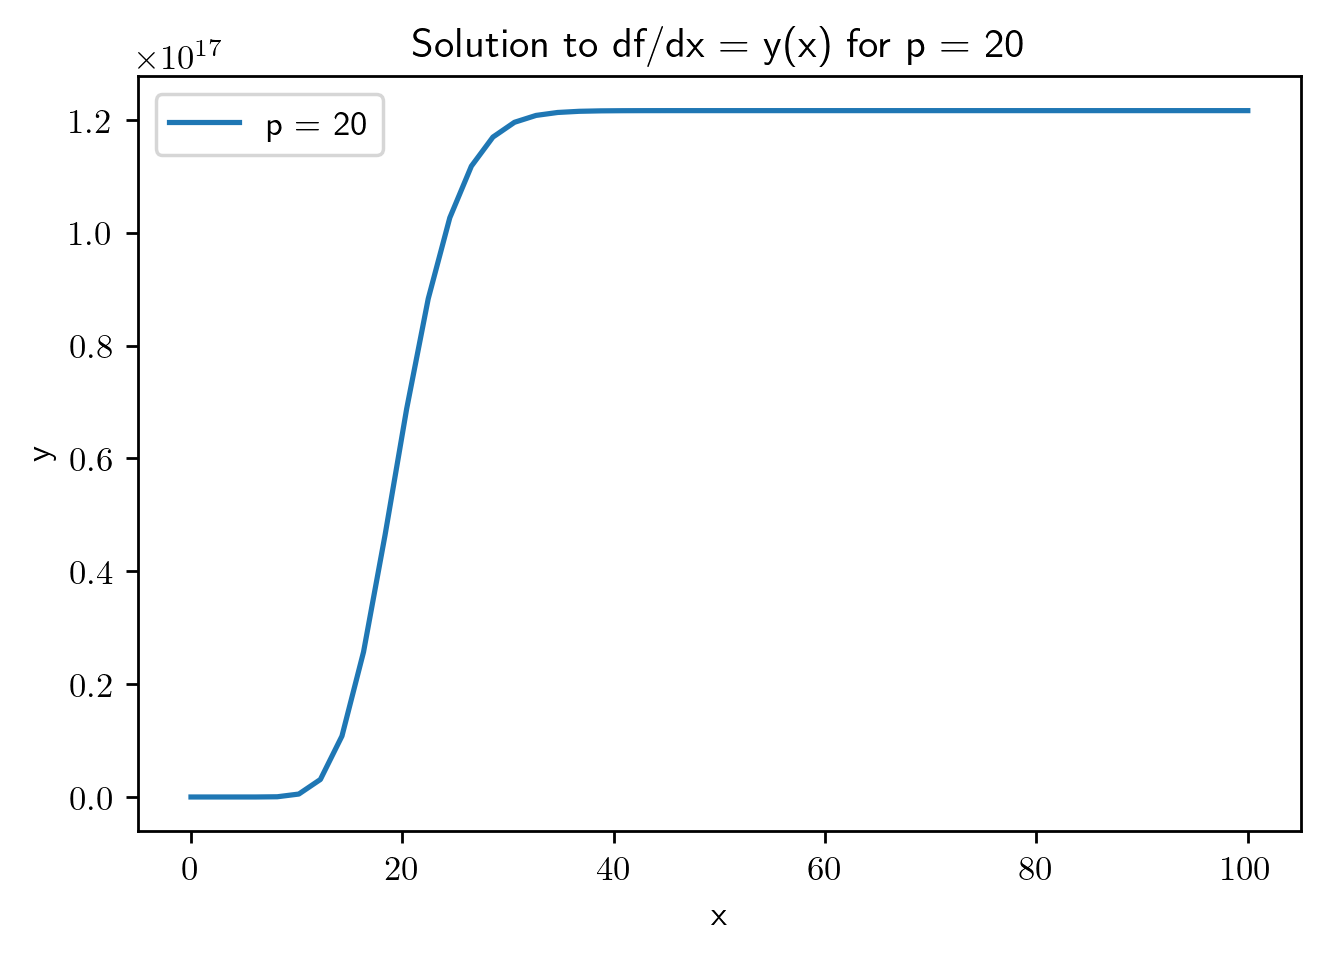

In [9]:
for p in [2.5, 5, 10, 20]:
    t = np.linspace(0, 100)
    def dfdx(x, t):
        return y(t)

    f = odeint(dfdx, 0, t)
    plt.figure()
    plt.plot(t, f, label='p = '+str(p))
    add_labels('x', 'y', 'Solution to df/dx = y(x) for p = '+str(p))

# x is probably large enough at x = 100. I could compare to Gamma(x) for x = 100, but I'm out of time.


Now numerically integrate $$\int_0^{100} x^{p-1}e^{-x} dx$$ for p=2,5,10, 20,

In [14]:
'''
Plan: 
Literally just import quad and integrate it
For loop
'''

for p in [2.5, 5, 10, 20]:
    integral = quad(y, 0, 100)
    print(f'Integration of y(x) from 0 to 100 is {integral[0]}, with p = {p}')

Integration of y(x) from 0 to 100 is 1.3293403881791395, with p = 2.5
Integration of y(x) from 0 to 100 is 23.999999999999993, with p = 5
Integration of y(x) from 0 to 100 is 362880.00000000006, with p = 10
Integration of y(x) from 0 to 100 is 1.2164510040883203e+17, with p = 20


# Fitting

The snippet of code below brings in a set of energy data from a measurement of radon in air. Each of the 2499 entries corresponds to the number of events that are measured in a particular energy bin.   

Plot the data on a log scale.

In [15]:
import numpy as np
energies=np.linspace(1,2500,2499)
counts=np.array([80.000000,109.000000,179.000000,188.000000,159.000000,162.000000,152.000000,141.000000,160.000000,157.000000,168.000000,123.000000,135.000000,147.000000,123.000000,116.000000,143.000000,129.000000,129.000000,129.000000,124.000000,110.000000,124.000000,110.000000,119.000000,119.000000,104.000000,107.000000,99.000000,118.000000,97.000000,99.000000,111.000000,97.000000,95.000000,88.000000,104.000000,125.000000,108.000000,85.000000,107.000000,108.000000,96.000000,106.000000,104.000000,101.000000,85.000000,87.000000,96.000000,85.000000,90.000000,83.000000,84.000000,97.000000,93.000000,95.000000,87.000000,82.000000,75.000000,69.000000,84.000000,82.000000,88.000000,89.000000,76.000000,82.000000,92.000000,73.000000,96.000000,83.000000,85.000000,74.000000,82.000000,76.000000,79.000000,87.000000,78.000000,82.000000,76.000000,82.000000,69.000000,71.000000,67.000000,73.000000,90.000000,84.000000,77.000000,83.000000,76.000000,78.000000,68.000000,60.000000,79.000000,77.000000,64.000000,82.000000,79.000000,61.000000,67.000000,84.000000,63.000000,60.000000,79.000000,65.000000,68.000000,90.000000,60.000000,60.000000,47.000000,62.000000,61.000000,75.000000,80.000000,67.000000,62.000000,71.000000,53.000000,47.000000,54.000000,49.000000,63.000000,68.000000,45.000000,51.000000,42.000000,57.000000,62.000000,47.000000,54.000000,50.000000,54.000000,45.000000,44.000000,53.000000,41.000000,50.000000,47.000000,56.000000,43.000000,40.000000,47.000000,28.000000,46.000000,32.000000,40.000000,36.000000,39.000000,34.000000,35.000000,24.000000,50.000000,29.000000,32.000000,37.000000,38.000000,27.000000,32.000000,35.000000,30.000000,34.000000,29.000000,27.000000,32.000000,27.000000,30.000000,32.000000,35.000000,21.000000,30.000000,28.000000,20.000000,25.000000,23.000000,25.000000,26.000000,27.000000,32.000000,22.000000,25.000000,29.000000,22.000000,25.000000,24.000000,20.000000,24.000000,29.000000,24.000000,16.000000,20.000000,25.000000,12.000000,21.000000,16.000000,26.000000,22.000000,17.000000,26.000000,20.000000,18.000000,19.000000,20.000000,20.000000,14.000000,16.000000,26.000000,18.000000,23.000000,18.000000,29.000000,18.000000,21.000000,17.000000,16.000000,25.000000,12.000000,17.000000,23.000000,15.000000,16.000000,17.000000,15.000000,18.000000,22.000000,15.000000,19.000000,16.000000,5.000000,23.000000,14.000000,14.000000,9.000000,18.000000,17.000000,18.000000,19.000000,11.000000,16.000000,19.000000,14.000000,14.000000,12.000000,10.000000,11.000000,16.000000,16.000000,11.000000,16.000000,14.000000,12.000000,15.000000,6.000000,11.000000,3.000000,10.000000,15.000000,9.000000,16.000000,14.000000,11.000000,13.000000,13.000000,12.000000,12.000000,11.000000,17.000000,10.000000,21.000000,15.000000,7.000000,16.000000,13.000000,12.000000,19.000000,10.000000,13.000000,10.000000,12.000000,17.000000,9.000000,8.000000,12.000000,11.000000,15.000000,14.000000,8.000000,16.000000,14.000000,15.000000,8.000000,15.000000,16.000000,11.000000,14.000000,13.000000,11.000000,14.000000,9.000000,8.000000,14.000000,7.000000,5.000000,13.000000,10.000000,8.000000,11.000000,5.000000,15.000000,9.000000,11.000000,6.000000,8.000000,8.000000,9.000000,12.000000,6.000000,10.000000,10.000000,7.000000,10.000000,13.000000,8.000000,4.000000,15.000000,6.000000,9.000000,3.000000,14.000000,5.000000,9.000000,7.000000,11.000000,6.000000,12.000000,15.000000,10.000000,5.000000,8.000000,10.000000,7.000000,11.000000,11.000000,11.000000,12.000000,6.000000,11.000000,8.000000,5.000000,6.000000,5.000000,9.000000,8.000000,9.000000,7.000000,6.000000,4.000000,10.000000,6.000000,7.000000,11.000000,10.000000,8.000000,8.000000,14.000000,5.000000,10.000000,11.000000,11.000000,8.000000,8.000000,9.000000,9.000000,8.000000,14.000000,7.000000,4.000000,4.000000,4.000000,6.000000,10.000000,4.000000,9.000000,6.000000,4.000000,11.000000,5.000000,7.000000,7.000000,7.000000,4.000000,8.000000,4.000000,5.000000,6.000000,4.000000,8.000000,7.000000,7.000000,8.000000,10.000000,5.000000,6.000000,7.000000,7.000000,7.000000,3.000000,6.000000,12.000000,6.000000,2.000000,6.000000,2.000000,10.000000,7.000000,7.000000,8.000000,4.000000,5.000000,7.000000,8.000000,2.000000,5.000000,4.000000,8.000000,6.000000,11.000000,10.000000,5.000000,6.000000,5.000000,9.000000,7.000000,6.000000,6.000000,12.000000,1.000000,2.000000,3.000000,6.000000,4.000000,4.000000,14.000000,8.000000,8.000000,7.000000,8.000000,9.000000,4.000000,8.000000,5.000000,3.000000,3.000000,9.000000,6.000000,5.000000,5.000000,9.000000,7.000000,4.000000,5.000000,3.000000,8.000000,2.000000,5.000000,3.000000,3.000000,9.000000,5.000000,3.000000,2.000000,2.000000,4.000000,12.000000,8.000000,7.000000,5.000000,11.000000,6.000000,6.000000,8.000000,6.000000,6.000000,8.000000,10.000000,6.000000,2.000000,4.000000,6.000000,4.000000,9.000000,7.000000,4.000000,6.000000,7.000000,5.000000,9.000000,6.000000,3.000000,5.000000,3.000000,8.000000,7.000000,11.000000,2.000000,6.000000,3.000000,5.000000,5.000000,5.000000,7.000000,4.000000,7.000000,5.000000,7.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,7.000000,2.000000,4.000000,3.000000,5.000000,6.000000,5.000000,3.000000,3.000000,6.000000,8.000000,0.000000,8.000000,4.000000,4.000000,5.000000,2.000000,4.000000,0.000000,3.000000,3.000000,5.000000,4.000000,5.000000,3.000000,5.000000,2.000000,3.000000,1.000000,6.000000,6.000000,1.000000,2.000000,6.000000,6.000000,6.000000,3.000000,3.000000,1.000000,1.000000,9.000000,4.000000,3.000000,2.000000,2.000000,3.000000,4.000000,7.000000,1.000000,5.000000,4.000000,5.000000,4.000000,4.000000,2.000000,3.000000,1.000000,4.000000,5.000000,1.000000,6.000000,4.000000,3.000000,4.000000,3.000000,4.000000,0.000000,6.000000,6.000000,4.000000,2.000000,3.000000,5.000000,3.000000,7.000000,2.000000,2.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,6.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,4.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,4.000000,5.000000,5.000000,7.000000,3.000000,1.000000,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,7.000000,6.000000,5.000000,2.000000,4.000000,4.000000,3.000000,0.000000,3.000000,3.000000,3.000000,6.000000,2.000000,5.000000,3.000000,4.000000,7.000000,3.000000,1.000000,1.000000,6.000000,3.000000,5.000000,5.000000,1.000000,4.000000,1.000000,3.000000,3.000000,4.000000,5.000000,3.000000,2.000000,4.000000,3.000000,8.000000,2.000000,0.000000,2.000000,3.000000,5.000000,3.000000,5.000000,0.000000,2.000000,10.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,7.000000,2.000000,5.000000,0.000000,3.000000,4.000000,0.000000,2.000000,2.000000,2.000000,5.000000,3.000000,1.000000,6.000000,1.000000,5.000000,4.000000,5.000000,3.000000,6.000000,0.000000,4.000000,1.000000,5.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,3.000000,6.000000,3.000000,3.000000,1.000000,5.000000,2.000000,1.000000,3.000000,2.000000,2.000000,6.000000,6.000000,2.000000,5.000000,1.000000,1.000000,2.000000,4.000000,5.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,1.000000,5.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,0.000000,3.000000,3.000000,4.000000,0.000000,0.000000,4.000000,2.000000,1.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000,2.000000,0.000000,5.000000,0.000000,3.000000,3.000000,2.000000,1.000000,2.000000,4.000000,1.000000,4.000000,5.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,1.000000,7.000000,5.000000,2.000000,5.000000,1.000000,7.000000,7.000000,1.000000,3.000000,0.000000,2.000000,5.000000,3.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,2.000000,2.000000,5.000000,1.000000,7.000000,4.000000,2.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000,3.000000,3.000000,6.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,0.000000,1.000000,2.000000,3.000000,4.000000,1.000000,3.000000,5.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,7.000000,5.000000,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,0.000000,1.000000,5.000000,5.000000,3.000000,2.000000,1.000000,0.000000,4.000000,7.000000,0.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,0.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.000000,7.000000,3.000000,1.000000,1.000000,5.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,5.000000,3.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,1.000000,4.000000,2.000000,0.000000,4.000000,4.000000,1.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,1.000000,5696.000000,7.000000,3.000000,0.000000,2.000000,4.000000,5.000000,5.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,1.000000,4.000000,3.000000,5.000000,2.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,0.000000,2.000000,2.000000,4.000000,2.000000,5.000000,4.000000,3.000000,6.000000,4.000000,5.000000,4.000000,6.000000,6.000000,4.000000,3.000000,2.000000,3.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,7.000000,4.000000,6.000000,4.000000,4.000000,3.000000,4.000000,8.000000,5.000000,5.000000,7.000000,9.000000,9.000000,2.000000,5.000000,7.000000,8.000000,4.000000,6.000000,3.000000,4.000000,6.000000,5.000000,6.000000,5.000000,5.000000,4.000000,5.000000,9.000000,4.000000,6.000000,8.000000,11.000000,7.000000,6.000000,5.000000,5.000000,12.000000,2.000000,10.000000,9.000000,6.000000,9.000000,4.000000,9.000000,13.000000,9.000000,7.000000,8.000000,7.000000,8.000000,3.000000,4.000000,9.000000,12.000000,6.000000,12.000000,12.000000,15.000000,16.000000,14.000000,10.000000,14.000000,17.000000,8.000000,15.000000,13.000000,13.000000,7.000000,11.000000,18.000000,17.000000,21.000000,14.000000,21.000000,22.000000,19.000000,16.000000,15.000000,24.000000,23.000000,27.000000,29.000000,18.000000,25.000000,20.000000,33.000000,46.000000,23.000000,25.000000,28.000000,28.000000,31.000000,31.000000,24.000000,30.000000,39.000000,38.000000,39.000000,38.000000,32.000000,36.000000,30.000000,41.000000,46.000000,38.000000,49.000000,48.000000,39.000000,55.000000,44.000000,48.000000,47.000000,57.000000,49.000000,58.000000,66.000000,65.000000,62.000000,70.000000,67.000000,54.000000,65.000000,52.000000,58.000000,61.000000,59.000000,64.000000,63.000000,61.000000,69.000000,78.000000,74.000000,68.000000,74.000000,70.000000,94.000000,62.000000,69.000000,74.000000,85.000000,63.000000,72.000000,78.000000,63.000000,64.000000,70.000000,81.000000,55.000000,68.000000,77.000000,65.000000,54.000000,72.000000,67.000000,66.000000,67.000000,56.000000,44.000000,60.000000,64.000000,63.000000,50.000000,47.000000,52.000000,44.000000,42.000000,65.000000,41.000000,38.000000,56.000000,42.000000,43.000000,43.000000,47.000000,29.000000,34.000000,36.000000,35.000000,46.000000,39.000000,30.000000,32.000000,36.000000,34.000000,20.000000,35.000000,21.000000,26.000000,35.000000,20.000000,23.000000,24.000000,25.000000,24.000000,22.000000,24.000000,2534.000000,25.000000,17.000000,18.000000,20.000000,21.000000,17.000000,15.000000,17.000000,16.000000,17.000000,12.000000,18.000000,879.000000,11.000000,13.000000,11.000000,10.000000,8.000000,12.000000,10.000000,9.000000,11.000000,9.000000,10.000000,5.000000,13.000000,5.000000,10.000000,8.000000,9.000000,8.000000,8.000000,7.000000,13.000000,9.000000,5.000000,7.000000,7.000000,10.000000,12.000000,2.000000,8.000000,5.000000,9.000000,5.000000,7.000000,8.000000,6.000000,8.000000,7.000000,8.000000,11.000000,11.000000,9.000000,5.000000,8.000000,10.000000,12.000000,8.000000,7.000000,12.000000,10.000000,6.000000,10.000000,13.000000,4.000000,8.000000,15.000000,12.000000,7.000000,11.000000,11.000000,10.000000,18.000000,9.000000,14.000000,7.000000,15.000000,15.000000,17.000000,14.000000,20.000000,14.000000,23.000000,25.000000,16.000000,16.000000,24.000000,17.000000,16.000000,18.000000,26.000000,18.000000,22.000000,22.000000,25.000000,23.000000,27.000000,24.000000,30.000000,20.000000,38.000000,38.000000,30.000000,37.000000,41.000000,41.000000,38.000000,22.000000,47.000000,35.000000,40.000000,43.000000,49.000000,38.000000,38.000000,45.000000,43.000000,42.000000,38.000000,41.000000,46.000000,45.000000,52.000000,44.000000,50.000000,46.000000,53.000000,50.000000,59.000000,58.000000,52.000000,50.000000,49.000000,41.000000,36.000000,45.000000,57.000000,56.000000,61.000000,47.000000,51.000000,54.000000,74.000000,62.000000,45.000000,48.000000,52.000000,61.000000,56.000000,50.000000,40.000000,47.000000,41.000000,41.000000,35.000000,49.000000,44.000000,47.000000,47.000000,38.000000,45.000000,38.000000,45.000000,35.000000,45.000000,40.000000,44.000000,33.000000,36.000000,31.000000,46.000000,44.000000,35.000000,30.000000,35.000000,27.000000,26.000000,33.000000,30.000000,22.000000,34.000000,24.000000,23.000000,23.000000,23.000000,20.000000,17.000000,24.000000,25.000000,19.000000,18.000000,22.000000,13.000000,15.000000,17.000000,19.000000,18.000000,10.000000,17.000000,14.000000,12.000000,7.000000,11.000000,9.000000,14.000000,10.000000,8.000000,7.000000,5.000000,5.000000,6.000000,7.000000,9.000000,6.000000,5.000000,6.000000,6.000000,4.000000,1.000000,8.000000,6.000000,3.000000,4.000000,4.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,3.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2140.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,816.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,5.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,3.000000,2.000000,2.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,6.000000,3.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000,4.000000,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,2.000000,0.000000,2.000000,3.000000,5.000000,0.000000,0.000000,2.000000,2.000000,0.000000,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,5.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,4.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,5.000000,3.000000,2.000000,3.000000,3.000000,6.000000,2.000000,2.000000,3.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,4.000000,8.000000,3.000000,3.000000,6.000000,3.000000,0.000000,3.000000,5.000000,2.000000,4.000000,8.000000,2.000000,5.000000,3.000000,4.000000,4.000000,4.000000,6.000000,2.000000,2.000000,5.000000,17.000000,4.000000,3.000000,1.000000,8.000000,8.000000,6.000000,7.000000,6.000000,7.000000,10.000000,8.000000,6.000000,11.000000,9.000000,4.000000,8.000000,9.000000,5.000000,6.000000,7.000000,11.000000,13.000000,16.000000,9.000000,7.000000,13.000000,12.000000,7.000000,10.000000,14.000000,10.000000,14.000000,15.000000,11.000000,18.000000,16.000000,18.000000,14.000000,12.000000,22.000000,14.000000,16.000000,17.000000,11.000000,10.000000,22.000000,14.000000,30.000000,22.000000,14.000000,26.000000,25.000000,22.000000,15.000000,17.000000,27.000000,23.000000,30.000000,23.000000,18.000000,34.000000,20.000000,33.000000,25.000000,29.000000,34.000000,41.000000,38.000000,40.000000,30.000000,42.000000,31.000000,26.000000,25.000000,42.000000,32.000000,32.000000,46.000000,35.000000,32.000000,44.000000,41.000000,42.000000,49.000000,38.000000,44.000000,46.000000,60.000000,39.000000,44.000000,35.000000,38.000000,41.000000,30.000000,55.000000,48.000000,48.000000,53.000000,44.000000,46.000000,52.000000,47.000000,55.000000,64.000000,46.000000,48.000000,54.000000,41.000000,54.000000,63.000000,44.000000,46.000000,48.000000,52.000000,46.000000,46.000000,38.000000,48.000000,42.000000,45.000000,55.000000,44.000000,38.000000,38.000000,38.000000,36.000000,42.000000,43.000000,39.000000,39.000000,42.000000,36.000000,42.000000,37.000000,29.000000,29.000000,23.000000,30.000000,25.000000,28.000000,34.000000,32.000000,30.000000,25.000000,19.000000,25.000000,20.000000,26.000000,20.000000,25.000000,21.000000,16.000000,24.000000,14.000000,27.000000,23.000000,9.000000,15.000000,15.000000,19.000000,20.000000,16.000000,15.000000,12.000000,17.000000,8.000000,9.000000,14.000000,11.000000,9.000000,9.000000,14.000000,10.000000,6.000000,5.000000,6.000000,4.000000,5.000000,6.000000,7.000000,8.000000,4.000000,2.000000,9.000000,3.000000,5.000000,9.000000,6.000000,7.000000,6.000000,8.000000,8.000000,5.000000,2.000000,3.000000,1.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,1.000000,5.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,4.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,6.000000,1.000000,5.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000,1.000000,2.000000,3.000000,0.000000,5.000000,2.000000,2.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,0.000000,0.000000,3.000000,1.000000,5.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000])
print(len(counts))


2499


In [16]:
'''
Plan: 

- Plot the data on a logscale. (have no idea how to do that but I can probably check now). It's probably plt.semilog
- I don't think it makes sense to log in y, so use plt.semilogx
- Get the data, then call scipy.optimize.curve_fit.
- Compute everything else
'''

"\nPlan: \n\n- Plot the data on a logscale. (have no idea how to do that but I can probably check now). It's probably plt.semilog\n- Get the data, then call scipy.optimize.curve_fit.\n- Compute everything else\n"

Now fit the peak between 1800<= Energy<2000 to the gaussian function $$y=Ae^{-\frac{(x-x_0)^2}{2\sigma^2}},$$ with free parameters $A, x_0,\sigma$.   Plot the data, fit, and residuals.  Note that for a "counting experiment" such as this one, if the number of counts in bin i is $n_i$, the uncertainty in $n_i$ is $\sqrt{n_i}$

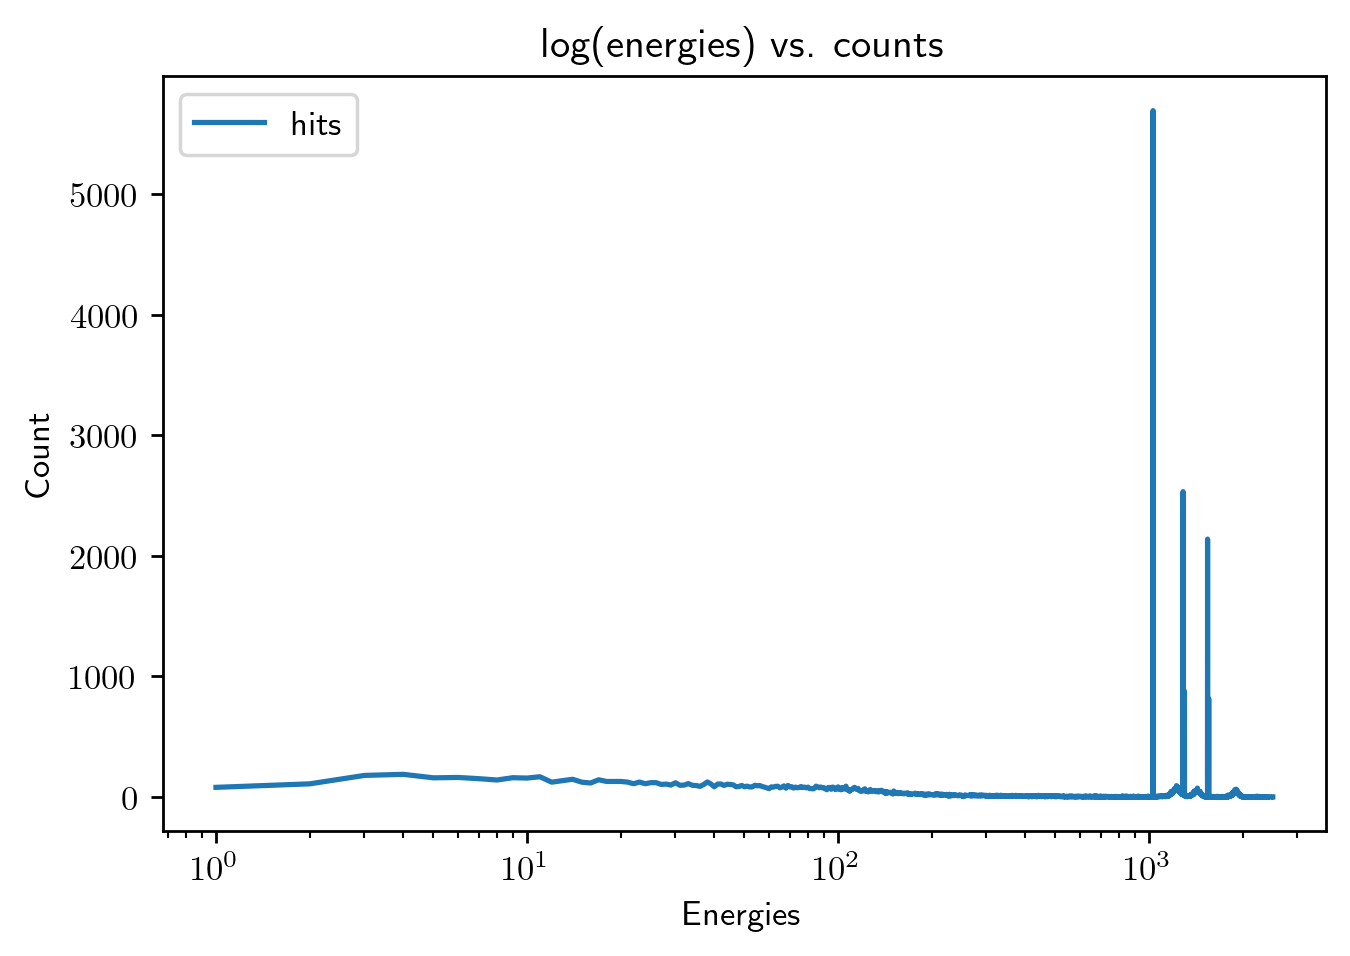

In [26]:
plt.figure()
plt.semilogx(energies, counts, label='hits')
add_labels('Energies', 'Count', 'log(energies) vs. counts')

No handles with labels found to put in legend.


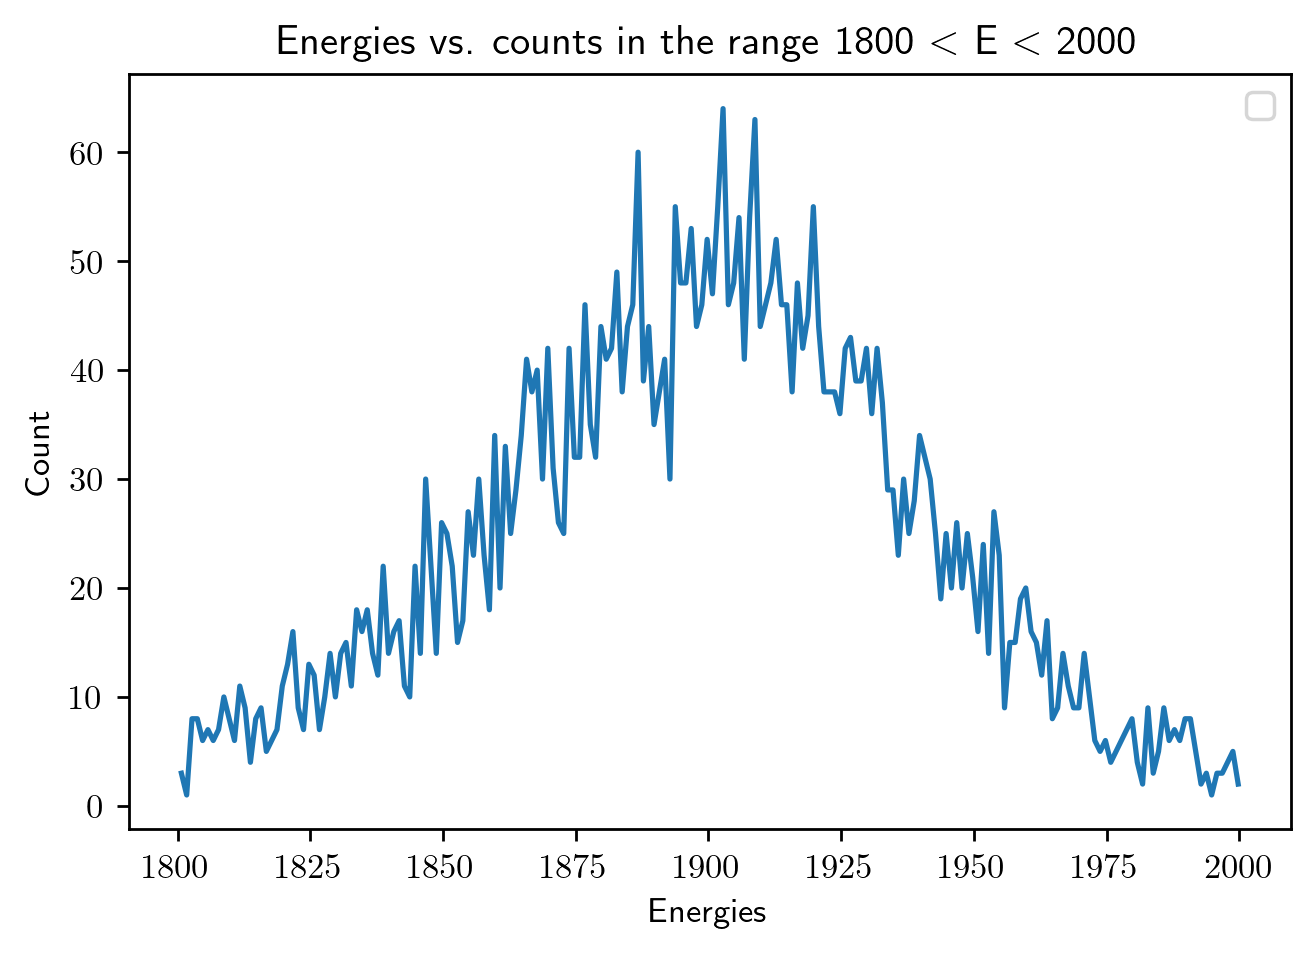

In [38]:
mask = (1800 < energies) & (energies < 2000)

energies[mask]
counts[mask]

plt.plot(energies[mask], counts[mask])
add_labels('Energies', 'Count', 'Energies vs. counts in the range 1800 $<$ E $<$ 2000')

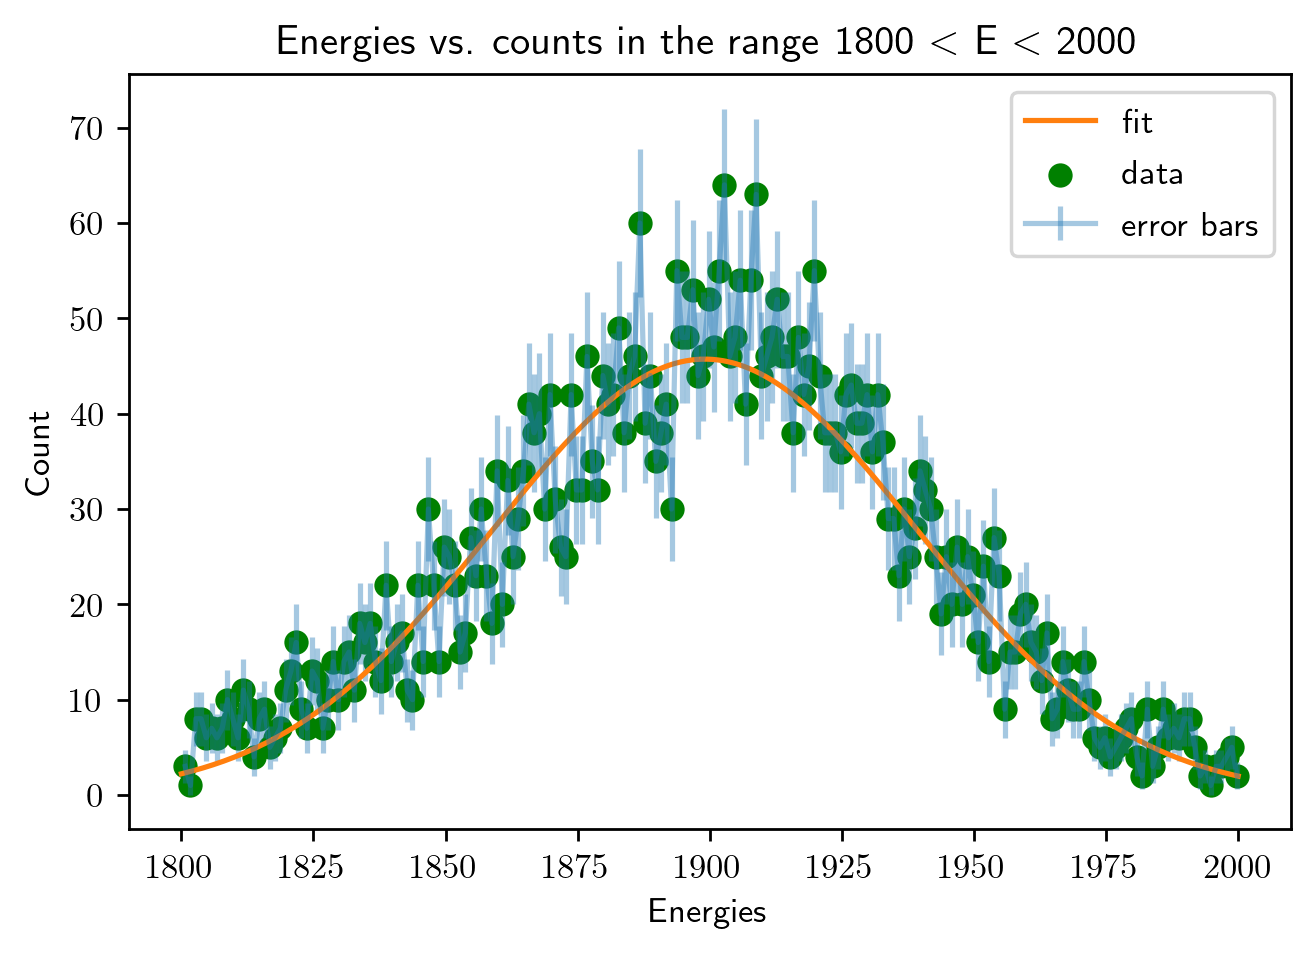

In [68]:
from scipy.optimize import curve_fit

def fitfunc(x, A, x0, sigma):
    return A*np.exp(-(x - x0)**2/(2*sigma**2))

yerr = np.sqrt(counts[mask])
# the uncertainty for weighted linear least squares

optimal = curve_fit(fitfunc, energies[mask], counts[mask], p0 = np.array([60, 1900, 100]), sigma=yerr)
best_A, best_x0, best_sigma = optimal[0]

energy_continuous = np.linspace(1800, 2000, 200)
fitfunc(energy_continuous, best_A, best_x0, best_sigma)

plt.scatter(energies[mask], counts[mask], label='data', c='g')
plt.errorbar(energies[mask], counts[mask], yerr=yerr,alpha=0.4, label='error bars')
plt.plot(energy_continuous, fitfunc(energy_continuous, best_A, best_x0, best_sigma), label='fit')
add_labels('Energies', 'Count', 'Energies vs. counts in the range 1800 $<$ E $<$ 2000')

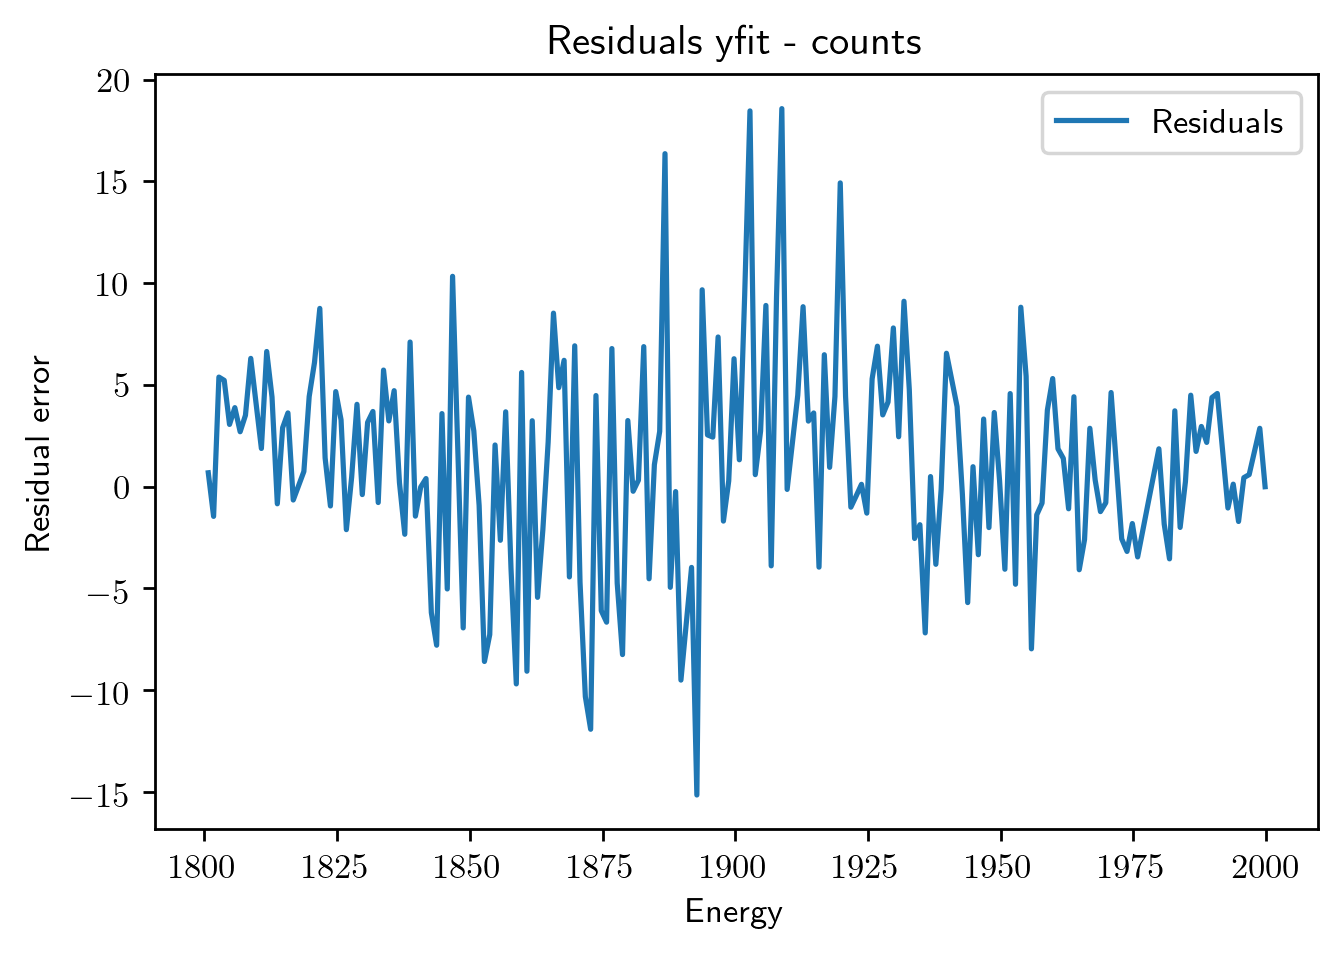

In [58]:
# Residuals.

residuals = counts[mask] - fitfunc(energies[mask], best_A, best_x0, best_sigma)
# Could square the residuals or take the absolute value, your choice. Just call np.abs, or np.square

plt.plot(energies[mask], residuals, label='Residuals')
add_labels('Energy', 'Residual error', 'Residuals: yfit - counts')

# Don't forget to upload your work to eclass!